In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
datagen=ImageDataGenerator(rescale=1/255)

In [3]:
train_data=datagen.flow_from_directory(r"C:\Users\Neha\Downloads\brain tumour\Training",
                                      target_size=(224,224),
                                      batch_size=32,
                                      class_mode='categorical')

Found 2870 images belonging to 4 classes.


In [4]:
test_data=datagen.flow_from_directory(r"C:\Users\Neha\Downloads\brain tumour\Testing",
                                     target_size=(224,224),
                                     batch_size=32,
                                     class_mode='categorical')

Found 394 images belonging to 4 classes.


In [5]:
from tensorflow.keras import layers, models

In [10]:
model=models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(train_data.num_classes,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,179,428 (42.65 MB)

 Trainable params: 11,179,428 (42.65 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history=model.fit(train_data,epochs=10)

Epoch 1/10


C:\Users\Neha\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 68s 700ms/step - accuracy: 0.4514 - loss: 1.2465
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 51s 562ms/step - accuracy: 0.6561 - loss: 0.8002
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 55s 598ms/step - accuracy: 0.7501 - loss: 0.6029
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 54s 591ms/step - accuracy: 0.8058 - loss: 0.4578
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 626ms/step - accuracy: 0.8673 - loss: 0.3324
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 56s 611ms/step - accuracy: 0.8891 - loss: 0.3024
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 55s 599ms/step - accuracy: 0.9176 - loss: 0.2334
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 55s 599ms/step - accuracy: 0.9413 - loss: 0.1466
Epoch 9/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 55s 598ms/step - accuracy: 0.9685 - loss: 0.1062
Epoch 10/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 54s 595ms/step - accuracy: 0.9692 - loss: 0.0995


In [12]:
test_accuracy,test_loss=model.evaluate(test_data)
print(test_accuracy)
print(test_loss)

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 329ms/step - accuracy: 0.7363 - loss: 1.8895
1.8124620914459229
0.7614213228225708


In [13]:
class_labels=list(train_data.class_indices.keys())
print(class_labels)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [18]:
predictions=model.predict(test_data)
print(predictions)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step
[[1.1226212e-02 6.1189000e-02 9.1250008e-01 1.5084780e-02]
 [1.8749379e-02 4.0182266e-01 3.0464640e-01 2.7478153e-01]
 [5.0721825e-05 9.9673826e-01 3.2049525e-03 6.0806519e-06]
 ...
 [3.7737922e-03 1.3459229e-01 8.2544500e-01 3.6188904e-02]
 [2.9129003e-05 9.8783225e-01 1.2054239e-02 8.4468455e-05]
 [3.7882902e-10 4.5353959e-06 9.9999547e-01 3.3630847e-09]]


16
Actual Class : meningioma_tumor
Predicted Class : meningioma_tumor


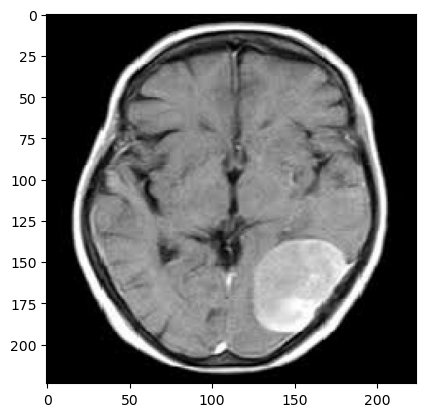

In [41]:
import random
import matplotlib.pyplot as plt
import numpy as np

n=random.randint(0,len(test_data[0][0])-1)
print(n)
plt.imshow(test_data[0][0][n])

print("Actual Class :", class_labels[np.argmax(test_data[0][1][n])])
print('Predicted Class :', class_labels[np.argmax(predictions[n])])